# Week 04 Handson - Data Preprocessing #03 (Image - Video)
In this week, we will play about data preprocessing for image/video. We will use part of [Caltect256](http://www.vision.caltech.edu/Image_Datasets/Caltech256/) dataset which originally consists of 257 classes, but we will use 3 classes of them for this hands-on purpose.

For this week handson, several things you need to consider:
1. Install python libraries: opencv, numpy, matplotlib and scikit-learn. You can do "pip install library_name", for example.
2. Two datasets are provided within the zip file: ```part_of_caltech256``` (images) and  ```video01.mp4``` (video). Use and adjust the path accordingly.
3. Please upload to the course portal only this jupyter notebook file. Make sure that for each milestone, **you have the cell output** (not blank).

# Given Basic Code

In [16]:
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
import skimage as sk

def read_dataset(dataset_path):
    """
    parameter:
    (a) dataset_path: path of the dataset [type: string]
    
    this function will return:
    (1) file_path: full path of each image file [type: 1D numpy array]
    (2) class_label: class of each image file, in numerical value 
                     [type: 1D numpy array]
    (3) class_dictionary: key(string) -> value (string), where 'key' is from (2) 
        and 'value' is from 'folder_name' [type: dictionary]
    """
    list_folder_per_kelas = os.listdir(dataset_path)
    list_folder_per_kelas = sorted(list_folder_per_kelas)
    file_path = []; class_label = np.ndarray(shape=(0)); class_dictionary = {}
    
    for i in range(len(list_folder_per_kelas)):#loop for all class folders
        class_folder_path = os.path.join(dataset_path, list_folder_per_kelas[i])
        list_image_name = os.listdir(class_folder_path)
        list_image_name = sorted(list_image_name)
        temp_file_path = [os.path.join(class_folder_path, j) for j in list_image_name]
        file_path += temp_file_path
        temp_class_label = np.full((len(list_image_name)),np.int16(i))
        class_label = np.concatenate((class_label, temp_class_label), axis=0)
        class_dictionary[str(i)] = list_folder_per_kelas[i]
    return np.asarray(file_path), class_label, class_dictionary

dataset_path = "./part_of_caltech256" # adjust with your own path
file_path, class_label, class_dictionary = read_dataset(dataset_path)   
print("file_path:\n", file_path[0:4], ", shape:", file_path.shape)
print("\nclass_label:\n", class_label[0:4], ", shape:", class_label.shape)
print("\nclass_dictionary:\n", class_dictionary)

file_path:
 ['./part_of_caltech256\\backpack\\003_0001.jpg'
 './part_of_caltech256\\backpack\\003_0002.jpg'
 './part_of_caltech256\\backpack\\003_0003.jpg'
 './part_of_caltech256\\backpack\\003_0004.jpg'] , shape: (150,)

class_label:
 [0. 0. 0. 0.] , shape: (150,)

class_dictionary:
 {'0': 'backpack', '1': 'butterfly', '2': 'cake'}


### Example of Read Image using OpenCV and Show via Matplotlib

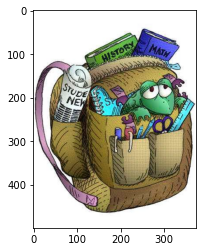

img.shape BGR: (500, 375, 3)


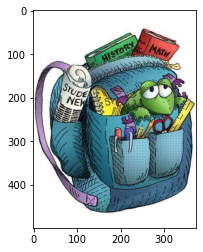

img.shape RGB: (500, 375, 3)


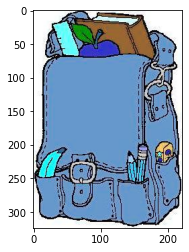

img.shape BGR: (324, 222, 3)


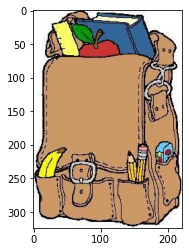

img.shape RGB: (324, 222, 3)


In [4]:
def show(img):
    plt.imshow(img)
    plt.show()
    
    
def read_and_show(image_path):
    '''
    function to read and show a given image file path.
    parameter:
    a. image_path: image file path
    '''
    # read as color image 
    img = cv2.imread(image_path, 1) #default opencv is in BGR, not RGB
    
    plt.imshow(img)
    plt.show()
    
    print("img.shape BGR:", img.shape)

    # in this hands-on, we will use matplotlib to show the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB 
                                               # (matplotlib use RGB format)
   
    show(img)
    print("img.shape RGB:", img.shape)
    
    

read_and_show(file_path[0])
read_and_show(file_path[1])

The two example images above have different sizes. Meanwhile in learning model, we need the inputs to have same sizes (dimensions), i.e., having same number of features. Two methods to tackle this issue are: (i) resizing the image into a fixed same size, and (ii) applying zero padding.<br>


## Note 1
1. For M01, M02, M03, M05 below, use the each function and **show** the first two images of each.
2. For M03, you don't need to do that, since it has 10k values for each image (too much to be printed).

## Milestone 01 (M01): image resizing
Please create a function that can resize all images in `file_path`.

prepocessed_images.shape: (150, 100, 100, 3)


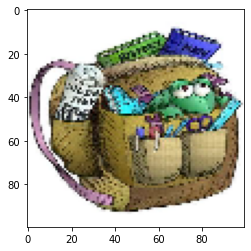

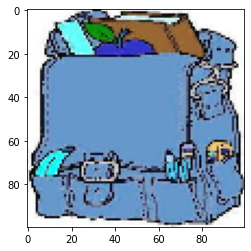

In [27]:
def resize_image(img_path, size=(100, 100)):
    # size=(width, height)
    '''
    parameter:
    a. img_path: file_path, which is 1D numpy array of all image file paths 
                 in the "Given Basic Code".
    b. size: tupple of desired image sizes, which is (width, height).
             In this hands-on week, use a default value of (100, 100).

    return:
    a. prepocessed_images = 4D numpy array with the size of 
                            (150,  desired_height, desired_width, 3).
    HINT: use "cv2.resize()" API to resize the image

    Tasks:
    a. prepocessed_images is in RGB format
    b. Please show first-two prepocessed_images with their sizes. 
       Make sure that both sizes are same.
    '''
    preprocessed_images = []
    for tmp_path in img_path:
        img = cv2.imread(tmp_path)
        preprocessed_images.append(cv2.resize(img , dsize=size))
    preprocessed_images = np.asarray(preprocessed_images)
    print("prepocessed_images.shape:", preprocessed_images.shape)
    return preprocessed_images

preprocessed_res_images = resize_image(file_path)

show(preprocessed_res_images[0])
show(preprocessed_res_images[1])

## M02: zero-padding
Please create a function that can apply zero padding to all images in `file_path`.

prepocessed_images.shape: (150, 100, 100, 3)


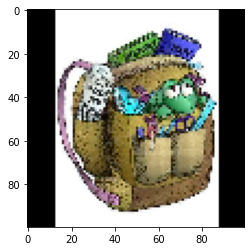

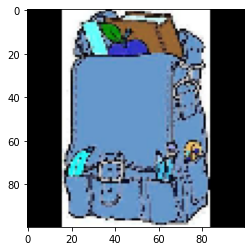

In [41]:
def image_resize(image, max_length=100):
    dim = None
    (height, width) = image.shape[:2]
    
    if height > width:
        r = max_length / float(height)
        dim = (int(width * r), max_length)
    else:
        r = max_length / float(width)
        dim = (max_length, int(height * r))

    return cv2.resize(image, dsize=dim)


def apply_zeropadding(img_path, size=(100, 100)):
    '''
    parameter:
    a. img_path: file_path, which is 1D numpy array of all image file paths 
                 in the "Given Basic Code".
    b. size: tupple of desired image sizes after zero padding, 
             which is (width, height). In this hands-on week, 
             use the default value of (100, 100).

    return:
    a. prepocessed_images = 4D numpy array with the size of 
                            (150,  desired_height, desired_width, 3).
    HINT: use "cv2.resize()" API so that the longer dimension becomes 100,
           then, pad the shorter dimension with zero intensity values.

    Tasks:
    a. prepocessed_images is in RGB format
    b. Please show first-two prepocessed_images with their sizes. 
       Make sure that both sizes are same.
    '''
    preprocessed_images = []
    for tmp_path in img_path:
        img = image_resize(cv2.imread(tmp_path), max_length=100)
        
        (height, width) = img.shape[:2]
        
        if height > width:
            n = int((size[1] - width) / 2)
            delta = size[1] - width - 2 * n
            img = np.pad(img, ((0,0), (n+delta,n), (0,0)), mode="constant", constant_values=0)
        else:
            n = int((size[0] - height) / 2)
            delta = size[0] - height - 2*n
            img = np.pad(img, ((n+delta,n), (0,0), (0,0)), mode="constant", constant_values=0)
        preprocessed_images.append(img)
    preprocessed_images = np.asarray(preprocessed_images)
    print("prepocessed_images.shape:", preprocessed_images.shape)
    return preprocessed_images

preprocessed_pad_images = apply_zeropadding(file_path)

show(preprocessed_pad_images[0])
show(preprocessed_pad_images[1])

## M03: grayscale image
Sometimes, using color images is too much so that our model becomes computationally expensive. Please make a function that can convert `prepocessed_images` from the result of `apply_zeropadding` function to grayscale images.

grayscale_images.shape: (150, 100, 100)


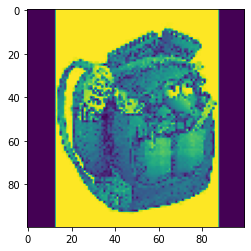

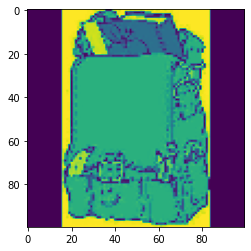

In [42]:
def convert_to_grayscale(input_img):
    '''
    parameter:
    a. input: "prepocessed_images" variable from the result of 
              "apply_zeropadding" function.

    return:
    a. grayscale_images = 4D numpy array with the size of 
                          (150,  100, 100, 1).
    HINT: use "cv2.cvtColor" API 
    
    Tasks:
    a. After finishing this function, use the function and show 
       first-two "grayscale_images".
    '''
    grayscale_images = np.asarray([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in input_img])
    print("grayscale_images.shape:", grayscale_images.shape)
    return grayscale_images

grayscale_imgs = convert_to_grayscale(preprocessed_pad_images)

show(grayscale_imgs[0])
show(grayscale_imgs[1])

## M04: 1D features
Image is a spatial data, having heigh and width. A method like CNN (Convolutional Neural Network) is designed for this type of input data. However, for certain purpose, we may use other methods, such as SVM, random forest, etc, and those all prefer to use 1D feature. Thus, please make a function that can perform such need.

In [44]:
def convert_to_onedimfeature(input_imgs):
    '''
    parameter:
    a. input: "grayscale_images" variable from 
               the result of "convert_to_grayscale" function.

    return:
    a. onedim_features = 2D numpy array with the size of 
                         (150,  10000).
    HINT: very easy~ 
    '''
    onedim_features = np.asarray([img.reshape(-1) for img in input_imgs])
    print("onedim_features.shape:", onedim_features.shape)
    return onedim_features

onedim_imgs = convert_to_onedimfeature(grayscale_imgs)
    

onedim_features.shape: (150, 10000)


# Image Augmentation
In image data, there are unlimited possibilities of the visual appearances, such as illumination (lighting), point of view, zooming factor, noise, etc, even from a single same object. To have a better model, we need a model that is more general to any possible visual appearance of the input image. To tackle this issue, we can apply data augmentation to the training set. See picture below.
<img src="cat_data_augmentation.png" alt="" width="500"/>

Eight pictures above are generated from one-same image. To generate those various image appeareances, we can apply, such as: (i) random flipping, (ii) random rotation, (iii) random translation, (iv) random zooming, (v) image shearing, (vi) add random noise, (vii) random cropping, etc. 

## M05: Image Augmentation
In this M05, you are asked to make a simple `data_augmentation` function with only two treatments: (i) radom rotation and (ii) random noise.<br>
**HINT**: For both (i) and (ii), you can use scikit-image libary API, which are `transform.rotate` from -25 to 25 degree and `util.random_noise`, respectively.

augmented_images.shape: (150, 100, 100, 3)


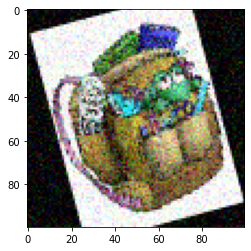

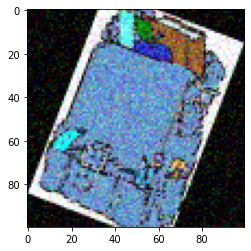

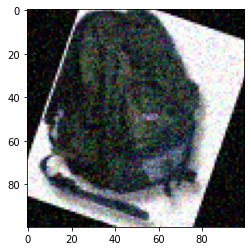

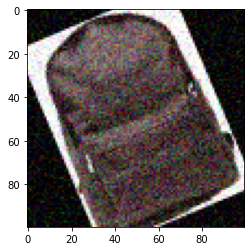

In [58]:
from skimage import transform

def image_augmentation(input_imgs):
    '''
    parameter: 
    a. input: "prepocessed_images" variable from 
              the result of "apply_zeropadding" function.
    
    return: 
    a. augmented_images: 4D numpy array with the size of 
                         (150,  desired_height, desired_width, 3), 
                         where each image is already randomly applied
                         by the transformation: (i) random rotation 
                         & (ii) random noise.
                         
    task:
    a. After finishing this function, use the function and show first-four 
       "augmented_images".
    '''
    augmented_images = np.asarray([sk.util.random_noise(
        transform.rotate(img, np.random.randint(-25, 25))) 
                                   for img in input_imgs])
    
    print("augmented_images.shape:", augmented_images.shape)
    
    return augmented_images

augmented_images = image_augmentation(preprocessed_pad_images)

show(augmented_images[0])
show(augmented_images[1])
show(augmented_images[2])
show(augmented_images[3])

## M06: extract a video
Video is actually a sequence of images (frames). In this M06, you are simply asked to make a function that can extract a video to images (frames).

extracted_images.shape: (119, 360, 640, 3)


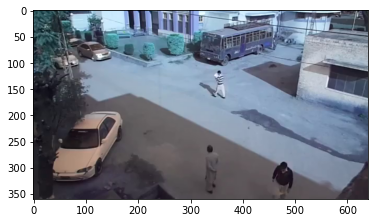

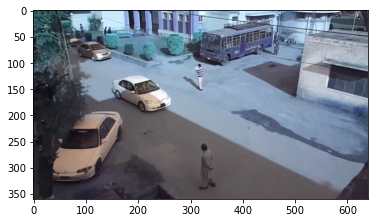

In [52]:
def extract_video(video_input):
    '''
    parameter:
    a. video_input: path of "video01.mp4" (provided in the zip file)
    
    return:
    a. extracted_images: 4D numpy array with the size of
                         (50, video_height=360, video_width=640, 3),
                         meaning that you are asked only to extract
                         first 50 frames of the video.
    Task:
    a. show the 1st, 25th and 50th image frames you extract from the given video.
                         
    HINT: use "cv2.VideoCapture" and ".read()" API for this M06.
    '''
    cap = cv2.VideoCapture(video_input)
    if not cap.isOpened:
        print('--(!)Error opening video capture')
        return
    
    extracted_images = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        extracted_images.append(frame)
        
    extracted_images = np.asarray(extracted_images)
    print("extracted_images.shape:", extracted_images.shape)
    
    return extracted_images

extracted_images = extract_video("./video01.mp4")

show(extracted_images[0])

show(extracted_images[int(extracted_images.shape[0] / 2)])

## Note 2:

After pre-processing all those images/videos, it's ready to feed them into your learning model, such as classifier, since they are already in numerical data/features and have same feature size/dimension. Enjoy~